<a href="https://colab.research.google.com/github/winstonlingga/QM2Gr13/blob/main/QM2%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Impact of Oil Dependency on the Socio-Economic Development of Major Oil Exporters**



In [1]:
!pip install plotly
!pip install linearmodels
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import warnings
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 8)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.8 MB/s eta 0:00:00


1. Download Necessary Libraries and Upload Database Into a Data file
2. Use appropriate Data Imputation Techniques to Fill in Missing Data


In [2]:
!mkdir data
!mkdir data/grproject

In [3]:
from google.colab import files
uploaded = files.upload()

Saving COUNTRY DATA NEW - COUNTRY DATA-2.csv to COUNTRY DATA NEW - COUNTRY DATA-2.csv


In [4]:
df = pd.read_csv('COUNTRY DATA NEW - COUNTRY DATA-2.csv', skiprows = 2)

df.columns = ['Country', 'Year', 'GDP_per_Capita', 'Oil_Rent',
              'Debt_to_GDP_Ratio', 'HDI', 'Democracy_Index',
              'Civil_Rights_Freedom_Indexes', 'Gini_Coefficient', 'Oil_Export', 'Oil_Production']

In [5]:
# Convert 'Years' to integer and other numerical columns to float
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to numeric, making non-numeric values NaN
df.dropna(subset=['Year'], inplace=True)
df['Year'] = df['Year'].astype(int)
df['GDP_per_Capita'] = pd.to_numeric(df['GDP_per_Capita'], errors='coerce')
df['Oil_Rent'] = pd.to_numeric(df['Oil_Rent'], errors='coerce')
df['Debt_to_GDP_Ratio'] = pd.to_numeric(df['Debt_to_GDP_Ratio'], errors='coerce')
df['HDI'] = pd.to_numeric(df['HDI'], errors='coerce')
df['Gini_Coefficient'] = pd.to_numeric(df['Gini_Coefficient'], errors='coerce')
df['Oil_Export'] = pd.to_numeric(df['Oil_Export'], errors='coerce')
df['Oil_Production'] = pd.to_numeric(df['Oil_Production'], errors='coerce')

# Drop completely empty rows if any
df.dropna(how='all', inplace=True)

In [6]:
#Data Imputation
df['Gini_Coefficient'] = df['Gini_Coefficient'].interpolate(method='linear')
# Replace missing values with the mean or median of the country
df['GDP_per_Capita'] = df.groupby('Country')['GDP_per_Capita'].transform(lambda x: x.fillna(x.mean()))
df['Oil_Rent'] = df.groupby('Country')['Oil_Rent'].transform(lambda x: x.fillna(x.mean()))
df['Debt_to_GDP_Ratio'] = df.groupby('Country')['Debt_to_GDP_Ratio'].transform(lambda x: x.fillna(x.median()))


In [7]:
# Replace missing values with the mode of the country
df['Democracy_Index'] = df.groupby('Country')['Democracy_Index'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))
df['Civil_Rights_Freedom_Indexes'] = df.groupby('Country')['Civil_Rights_Freedom_Indexes'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))


# Verify the changes
print(df.head())
print(df.isnull().sum())


        Country  Year  GDP_per_Capita   Oil_Rent  Debt_to_GDP_Ratio    HDI  \
0  Saudi Arabia  2001      8337.32272  33.352663              93.70  0.744   
1  Saudi Arabia  2002      8380.95930  31.342448              96.90  0.750   
2  Saudi Arabia  2003      9321.80387  37.034522              82.00  0.760   
3  Saudi Arabia  2004     10935.01660  42.640930              65.00  0.770   
4  Saudi Arabia  2005     13462.76300  48.860631              37.35  0.780   

  Democracy_Index  Civil_Rights_Freedom_Indexes  Gini_Coefficient  Oil_Export  \
0            1.93                           4.5               NaN        6036   
1            1.93                           4.5               NaN        5285   
2            1.93                           4.5               NaN        6523   
3            1.93                           4.5               NaN        6813   
4            1.93                           4.5               NaN        7209   

   Oil_Production  
0            7889  
1   

In [8]:
print(df)

          Country  Year  GDP_per_Capita   Oil_Rent  Debt_to_GDP_Ratio    HDI  \
0    Saudi Arabia  2001      8337.32272  33.352663              93.70  0.744   
1    Saudi Arabia  2002      8380.95930  31.342448              96.90  0.750   
2    Saudi Arabia  2003      9321.80387  37.034522              82.00  0.760   
3    Saudi Arabia  2004     10935.01660  42.640930              65.00  0.770   
4    Saudi Arabia  2005     13462.76300  48.860631              37.35  0.780   
..            ...   ...             ...        ...                ...    ...   
120           UAE  2016     41054.53960  11.080756              19.40  0.870   
121           UAE  2017     43063.96750  13.498573              21.60  0.897   
122           UAE  2018     46722.26870  17.098994              20.90  0.909   
123           UAE  2019     45376.17080  15.681591              27.30  0.920   
124           UAE  2020     37629.17420  10.494098              36.90  0.912   

    Democracy_Index  Civil_Rights_Freed

As seen on the graph, the Gini Coefficienct for Saudi Arabia can not be interpolated as there is only one data point of reference, 2019. This is one of the major limitations to our research.

In [9]:
#Data Cleaning
df = df.replace(r'^\s*$', np.nan, regex=True) #replace the empty string or strings composed with whitespace charater np.nan
numeric_c = [col for col in df.columns if col != 'Country' and col != 'Year']
df[numeric_c] = df[numeric_c].apply(pd.to_numeric, errors='coerce') # change to numeric
df[numeric_c] = df[numeric_c].replace(' ', 'NaN', regex=True)

In [10]:
print(df)

          Country  Year  GDP_per_Capita   Oil_Rent  Debt_to_GDP_Ratio    HDI  \
0    Saudi Arabia  2001      8337.32272  33.352663              93.70  0.744   
1    Saudi Arabia  2002      8380.95930  31.342448              96.90  0.750   
2    Saudi Arabia  2003      9321.80387  37.034522              82.00  0.760   
3    Saudi Arabia  2004     10935.01660  42.640930              65.00  0.770   
4    Saudi Arabia  2005     13462.76300  48.860631              37.35  0.780   
..            ...   ...             ...        ...                ...    ...   
120           UAE  2016     41054.53960  11.080756              19.40  0.870   
121           UAE  2017     43063.96750  13.498573              21.60  0.897   
122           UAE  2018     46722.26870  17.098994              20.90  0.909   
123           UAE  2019     45376.17080  15.681591              27.30  0.920   
124           UAE  2020     37629.17420  10.494098              36.90  0.912   

     Democracy_Index  Civil_Rights_Free

**Exploratory Data Analysis (EDA)**:
To find relations between the variables in this data frame, we are going to conduct exploratory data analysis using boxplots and histograms for numerical data, scatter plots for categorical data, and line plots to visualise how data changes over time.

In [11]:
sns.set()

In [12]:
# Histogram
country_gdp = df.groupby('Country')['GDP_per_Capita'].mean().reset_index()
fig = px.bar(country_gdp, x='Country', y='GDP_per_Capita',
             title='Figure 1: Histogram of Average GDP per Capita per Country (2000-2020)',
             labels={'GDP_per_Capita': 'Average GDP per Capita (USD Thousands)', 'Country': 'Country'})

fig.show()

fig.write_html('histogram.html') #HTML File to upload into the main Wix Site

In [13]:
#Line Graph Plotting GDP Per Capita Trend Over Time
fig = px.line(df, x='Year', y='GDP_per_Capita', color='Country',
              hover_data=['Country', 'Year', 'GDP_per_Capita'],
              labels={'GDP_per_Capita': 'GDP per Capita ($)'})

fig.update_xaxes(range=[2000, 2020],
                 dtick=2,
                 tickangle=-45,
                 tickfont=dict(size=10))

fig.update_layout(
    title='Figure 2: GDP per Capita Trends (2000-2020)',
    xaxis_title='Year',
    yaxis_title='GDP per Capita ($)'
)

fig.show()

fig.write_html('line_chart_1.html') #HTML File to upload into the main Wix Site

In [ ]:
# Boxplot
fig = px.box(df, x='Country', y='GDP_per_Capita',
             title='Figure 3: Boxplot of GDP per Capita for Each Country (2000-2020)',
             labels={'GDP_per_Capita': 'GDP per Capita (USD Thousands)', 'Country': 'Country'})

fig.show()

fig.write_html('boxplot.html')

In [ ]:
# Correlation matrix to understand how variables relate to each other
corr = df.corr()

fig = px.imshow(corr,
                labels=dict(x="Variable", y="Variable", color="Correlation"),
                x=corr.columns, y=corr.columns,
                title="Figure 4: Correlation Matrix",
                color_continuous_scale=px.colors.diverging.RdBu)

fig.show()
fig.write_html('correlation_matrix.html')

In [ ]:
# Scatter plot to examine relationship between numerical variables
fig = px.scatter(df, x='GDP_per_Capita', y='Oil_Export', color='Country',
                 hover_data=['Country', 'Year', 'GDP_per_Capita', 'Oil_Export'],
                 labels={'GDP_per_Capita': 'GDP per Capita ($)', 'Oil_Export': 'Oil Export (bpd)'})

# Update layout and titles
fig.update_layout(
    title='Figure 5: Scatter Plot of GDP per Capita vs Oil Export Volume',
    xaxis_title='GDP per Capita (USD$)',
    yaxis_title='Oil Export (barrels per day)'
)
fig.show()

fig.write_html('scatter_plot.html')

**Panel Regression Analysis**

**Panel Regrssion Analysis** is a combination of cross section data and time series, where the same unit cross section is measured at different times.

With the panel data, we could analysis a country over multiple periods; and cross-section data enables the comparison of different countries at a point in time, allowing for the assessment of differences and similarities across countries.

We use a **fixed effects model (FE)** for panel regression, as the unobserved country-specific effects are likely to be correlated with our independent variables - Oil Export.


$$\ Y_{it}=\alpha+\beta(Oil~Export)_{it}+\mu{i}+\gamma{t}+\epsilon_{it}$$

Where:
* $\ Y_{it}$: The dependent variable for country i at time t.

*  $\alpha_i$: The fixed effect for each entity (country) i, capturing all unobserved, time-invariant influences on the oil export that are unique to each country.

* $\ Oil Export_{it}$: The independent variable, which is the oil export value for country i at time t.

*  $\beta$: Coefficient of oil export, showing the impact of oil exports on the dependent variable.

* $\mu{i}$and $\gamma{t}$: Unobserved country/time specific effect.

* $\epsilon_{it}$: The error term for country i at time t, representing other unobserved factors affected by oil export.

After printing out the regression table, we also generate scatter plot with regression line for better visualisation.



In [14]:
#Panel Regression
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.formula.api as smf
from linearmodels.panel import compare

df=df.set_index(['Country','Year'])
dependent_vars = ['Debt_to_GDP_Ratio', 'HDI', 'Democracy_Index', 'Civil_Rights_Freedom_Indexes', 'Gini_Coefficient']

models = {}
# Loop through each dependent variable
for dv in dependent_vars:
    formula = f'{dv} ~ 1 + Oil_Export + EntityEffects'
    model = PanelOLS.from_formula(formula, data=df).fit()
    models[dv] = model

print(compare(models, stars=True))

                                                            Model Comparison                                                            
                            Debt_to_GDP_Ratio              HDI     Democracy_Index     Civil_Rights_Freedom_Indexes     Gini_Coefficient
----------------------------------------------------------------------------------------------------------------------------------------
Dep. Variable               Debt_to_GDP_Ratio              HDI     Democracy_Index     Civil_Rights_Freedom_Indexes     Gini_Coefficient
Estimator                            PanelOLS         PanelOLS            PanelOLS                         PanelOLS             PanelOLS
No. Observations                          125              125                 115                              125                  108
Cov. Est.                          Unadjusted       Unadjusted          Unadjusted                       Unadjusted           Unadjusted
R-squared                              0.

**Panel Regression Results**
1. R-squared:
- Debt to GDP Ratio: The R-squared is 0.0229, indicating that the model explains about 2.29% of the variance in Debt to GDP Ratio within entities (groups or panels).
- HDI: An R-squared of 0.3657 suggests that 36.57% of the variance in HDI is explained by the model within entities.
- Democracy Index: The model explains 5.6% of the variance within entities.
- Civil Rights Freedom Indexes: Very low R-squared (0.0010), indicating the model explains almost none of the variance.
- Gini Coefficient: The model explains 4.03% of the variance within entities.
2. Significance of Oil Export (Coefficient):
- Debt to GDP Ratio: The coefficient is -0.0074, with a t-statistic of -1.6613, indicating a marginally significant negative relationship between oil exports and debt to GDP ratio.
- HDI: The coefficient is 2.656e-05 with a t-statistic of 8.2479, indicating a highly significant positive relationship.
- Democracy Index: The coefficient is -9.168e-05, significant at a t-statistic of -2.1381, suggesting a negative relationship.
- Civil Rights Freedom Indexes: The coefficient is -7.641e-06, but with a t-statistic of -0.2202, it is not statistically significant.
- Gini Coefficient: The coefficient is 0.0007, significant at a t-statistic of 2.0588, indicating a positive relationship.
3. Interpretation of Coefficients:
- Debt to GDP Ratio: A unit increase in oil exports is associated with a small but significant decrease in the debt to GDP ratio.
- HDI: Increases in oil exports are significantly associated with improvements in the Human Development Index.
- Democracy Index: Higher oil exports correlate with lower democracy indices, suggesting a potential negative impact on democratic measures.
- Civil Rights Freedom Indexes: The relationship between oil exports and civil rights freedom is not statistically significant.
- Gini Coefficient: Higher oil exports are associated with higher income inequality (as indicated by the Gini coefficient).
4. Entity Effects: The model includes entity effects, which means it controls for unobserved heterogeneity across entities (like countries or regions). This can help account for time-invariant characteristics.
5. Statistical Significance:
- F-statistic and P-value: For HDI, Democracy Index, and Gini Coefficient, the F-statistic is significant, indicating the overall model is statistically significant. For Debt to GDP Ratio and Civil Rights Freedom, the model is less robust.
- Intercepts: All models have significant intercepts.
6. Caveats:
- Causality: These results indicate correlation, not causation.
- Assumptions: Ensure that the assumptions of panel data regression are met for reliable interpretations.
- Context: Interpret these results within the economic and political context of the entities studied.

Overall, the results suggest varied impacts of oil exports on different socioeconomic and political indicators. The positive relationship with HDI and negative associations with the Democracy Index and Debt to GDP Ratio are particularly notable. However, the low R-squared values in some models indicate that oil exports alone do not explain a large portion of the variance in these indicators.

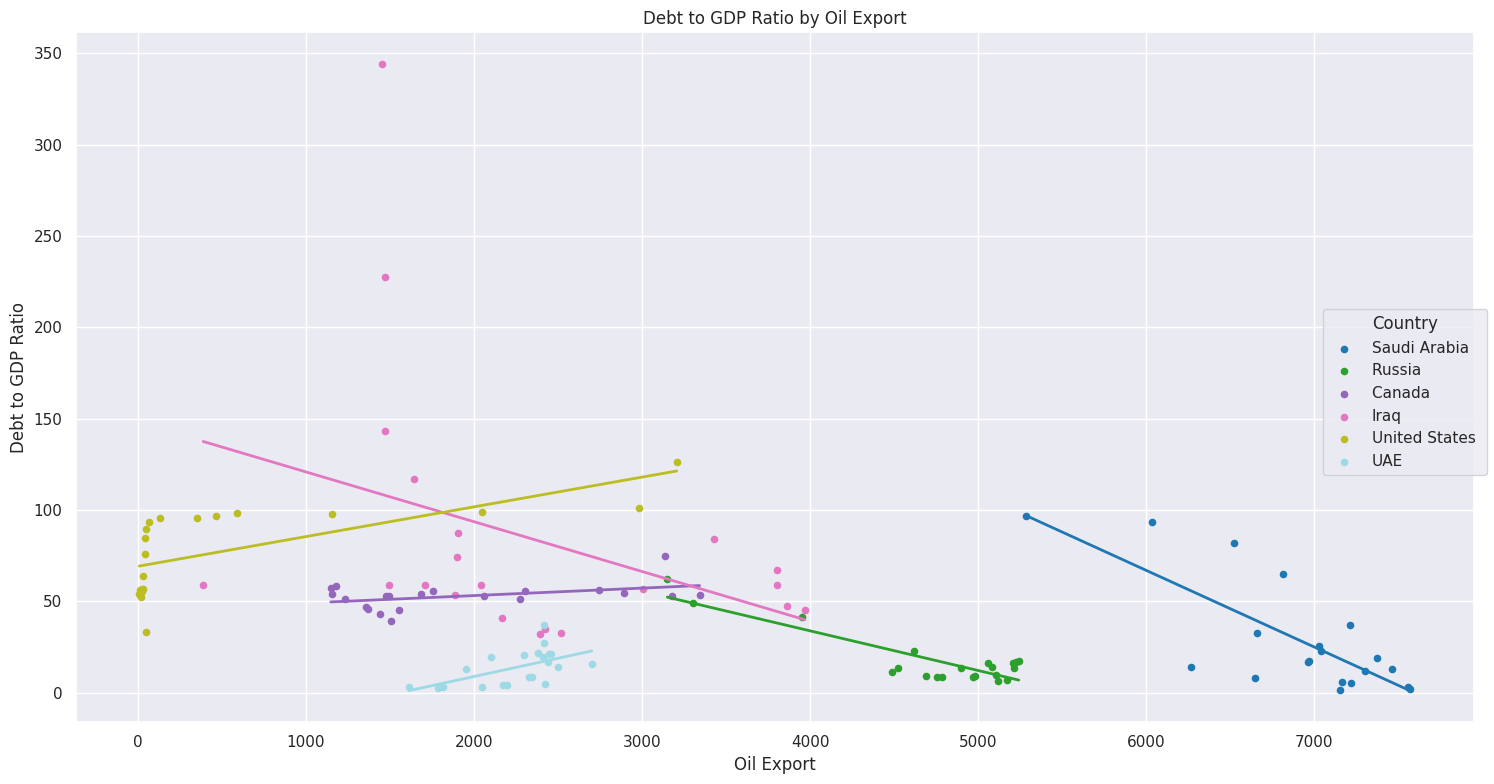

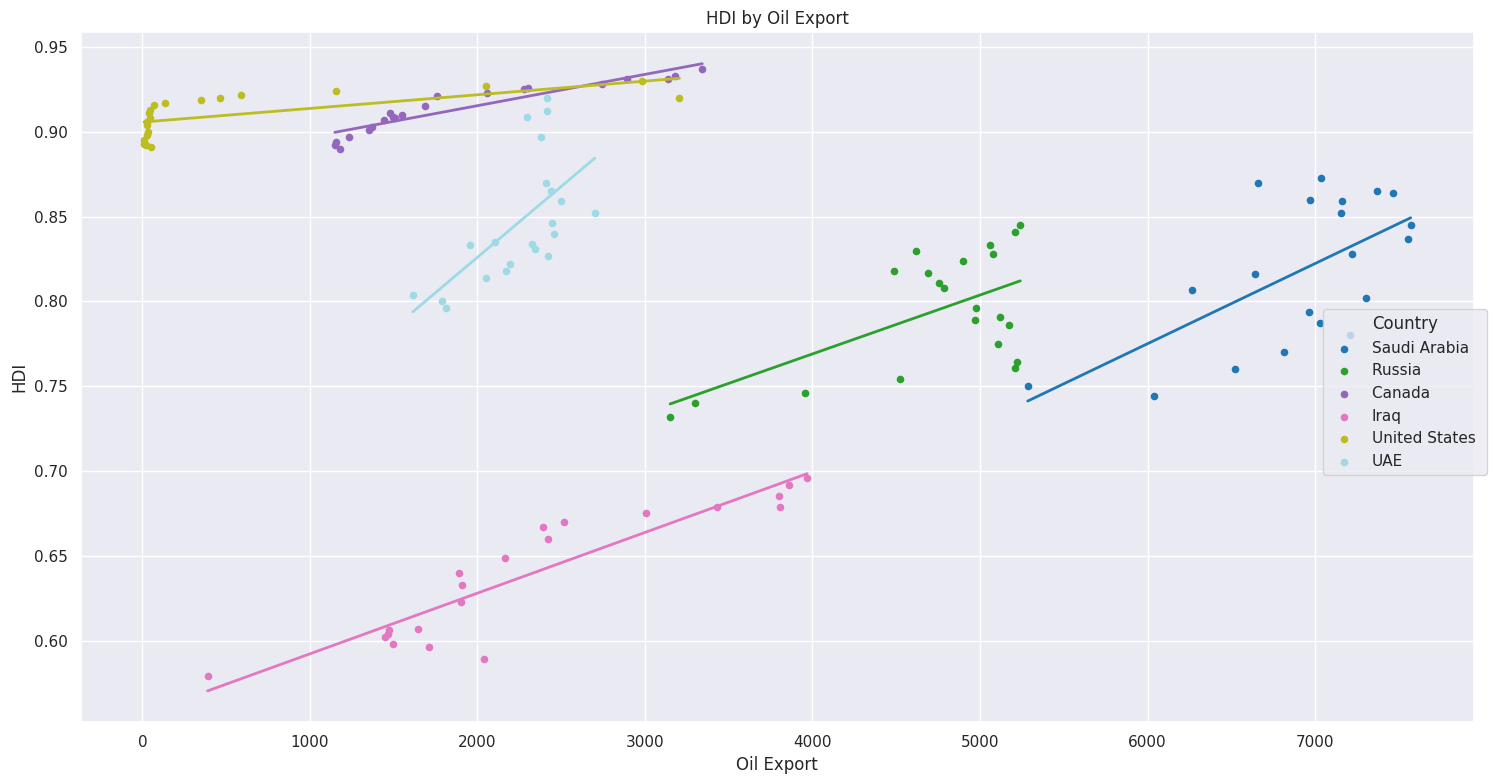

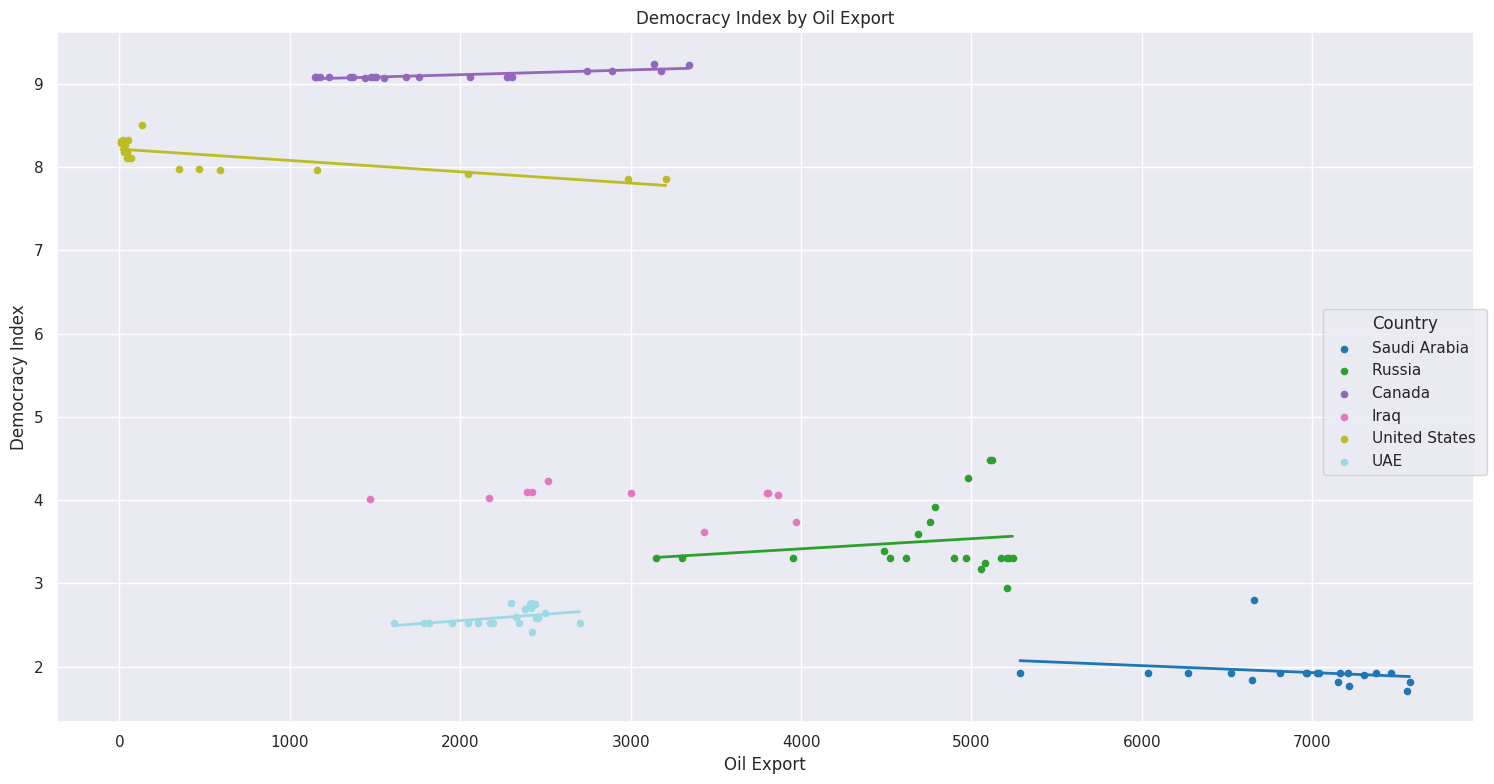

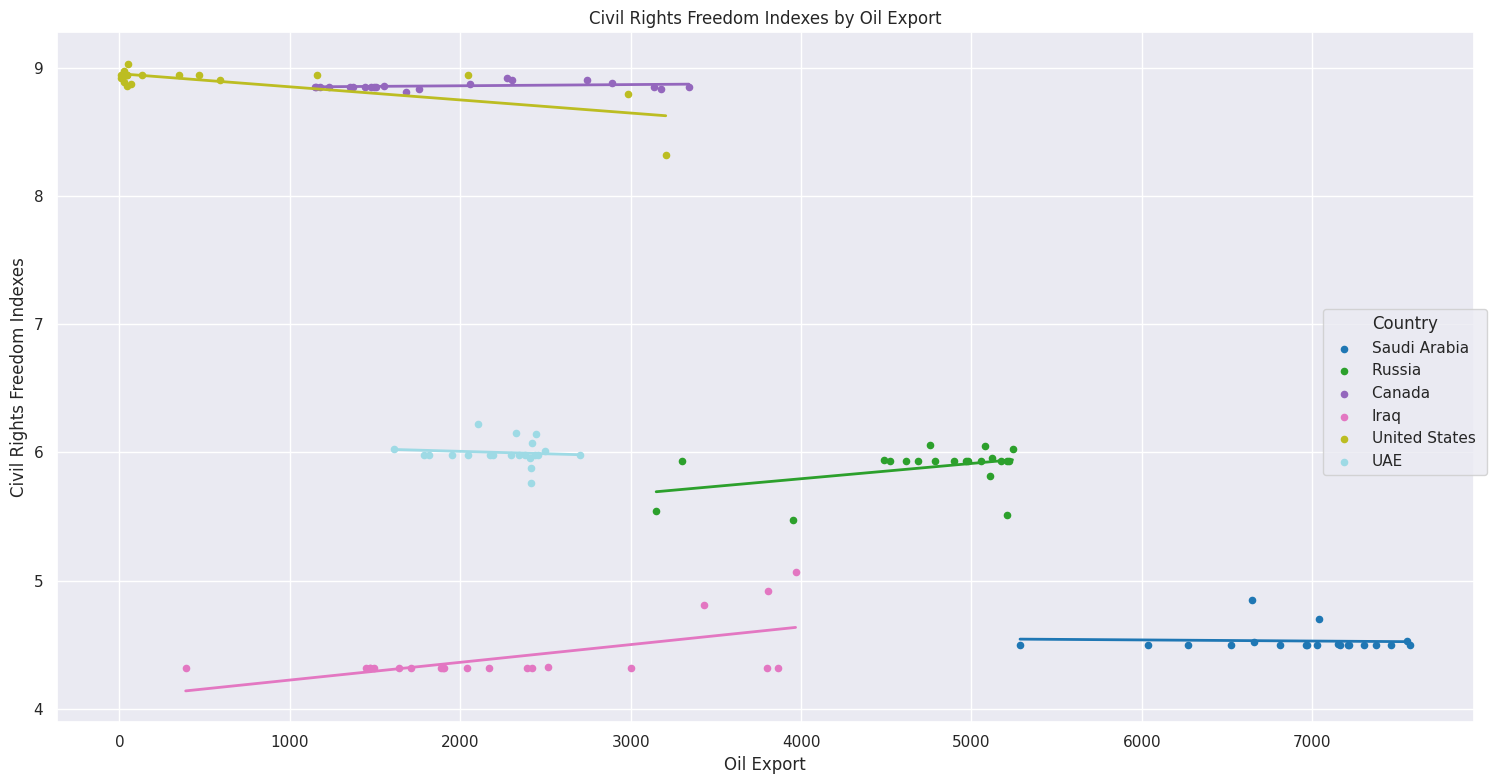

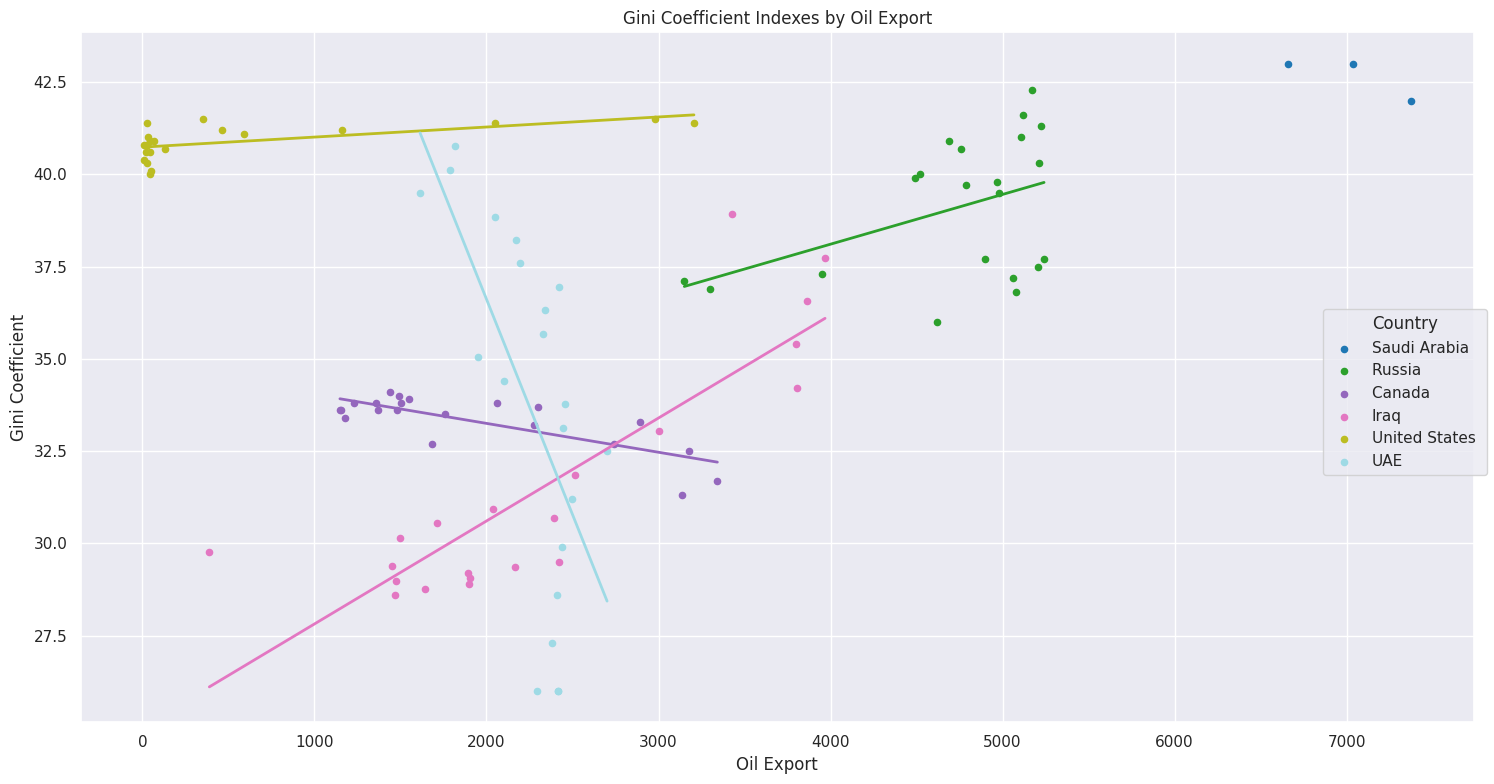

In [15]:
from scipy import stats

# Reset the index to access 'Country' and 'Year' for plotting.
df = df.reset_index()

# Define a colormap for the countries.
countries = df['Country'].unique()
color_map = plt.cm.tab20(np.linspace(0, 1, len(countries)))

# Set up a regression function
def plot_country_regression(ax, x, y, country_color):
    m, b = np.polyfit(x, y, 1)
    ax.plot(np.sort(x), m*np.sort(x) + b, color=country_color, linewidth=2)

# Create a function to plot seperate graphs
def plot_variable_against_oil_rent(variable, y_label, title):
  fig, axes = plt.subplots(figsize=(15, 8))
  for (color, country) in zip(color_map, countries):
    country_data = df[df['Country'] == country]
    axes.scatter(country_data['Oil_Export'], country_data[variable], color=color, label=country, s=20)
    plot_country_regression(axes, country_data['Oil_Export'], country_data[variable], color) # Plot the regression line
  axes.set_ylabel(y_label)
  axes.set_xlabel('Oil Export')
  axes.set_title(title)
# Add a legend
  handles, labels = axes.get_legend_handles_labels()
  fig.legend(handles, labels, loc='center right', ncol=1, title='Country')
# Plot the graph
  plt.tight_layout()
  plt.show()

# Plot each variable out
plot_variable_against_oil_rent('Debt_to_GDP_Ratio', 'Debt to GDP Ratio', 'Debt to GDP Ratio by Oil Export')
plot_variable_against_oil_rent('HDI', 'HDI', 'HDI by Oil Export')
plot_variable_against_oil_rent('Democracy_Index', 'Democracy Index', 'Democracy Index by Oil Export')
plot_variable_against_oil_rent('Civil_Rights_Freedom_Indexes', 'Civil Rights Freedom Indexes', 'Civil Rights Freedom Indexes by Oil Export')
plot_variable_against_oil_rent('Gini_Coefficient', 'Gini Coefficient', 'Gini Coefficient Indexes by Oil Export')

**Difference-in-Differenced Analysis** is a quasi-experimental design that makes use of longitudinal data from treatment and control groups to obtain an appropriate counterfactual to estimate a causal effect. DID is typically used to estimate the effect of a specific intervention or treatment (such as a passage of law, enactment of policy, or large-scale program implementation) by comparing the changes in outcomes over time between a population that is enrolled in a program (the intervention group) and a population that is not (the control group).


Treatment Event: 2016 OPEC Rebalancing Act

Despite a projected global oil glut, the Organisation of Petroleum Exporting Countries (OPEC) decided in November 2014 to maintain output. The end effect was a sharp drop in prices.

Two years later, on November 30, 2016, the group changed course and promised to cut OPEC's crude oil output by 1.2 million barrels per day (3.5 percent) over six months, to 32.5 million barrels per day, starting in January 2017. A minor price increase and some price stability were the results.

Although there might be a brief reprieve, additional oil production may begin rapidly  be stimulated by the price increase. The transient character is shown by a recent dramatic drop in prices brought on by larger than anticipated oil inventories in the United States.

This was one of the first times such a diverse group of major oil-producing countries, including both OPEC and non-OPEC members, came together to agree on production cuts. The agreement has had significant ramifications for global oil markets and the economies of the participating countries.

Conducting the DiD Analysis:
1. Defining the Treatment and Control Groups:

Treatment Group: Countries that became part of OPEC+ or significantly changed their engagement during the study period.
Control Group: Countries that did not join OPEC+ or whose membership status did not change significantly.
2. Setting the Time Frame:

Clearly define the "pre-treatment" and "post-treatment" periods based on the specific timing of the OPEC+ agreements or membership changes.

3. Statistical Modelling:

Use a regression model to estimate the treatment effect. The basic form of a DiD model is:

*Yit=α+β1⋅Postt+β2⋅Treatmenti+β3⋅(Postt×Treatmenti)+γXit+μi+λt+ϵit*

Where:
- *Yit*	is the outcome variable for country i at time t.

- *Postt* is a binary variable indicating the post-treatment period.

- *Treatmenti* is a binary variable indicating whether country i is in the treatment group.

- *Postt×Treatmenti* is the interaction term, whose coefficient (β3) estimates the DiD effect.

- *Xit* represents control variables.

- *μi* and *λt* represent country and time fixed effects, respectively.

- *ϵit* is the error term.

4. Checking Assumptions:

- Parallel Trends Assumption: Before the treatment, the treatment and control groups should have parallel trends in the outcome variable. This is crucial for the validity of the DiD estimator.
- No Interference: Ensure there's no spillover effect or interference between treatment and control groups.



In [16]:
#Treatment and Post-Treatment Indicator
# OPEC+ countries for treatment group
opec_plus = ['UAE', 'Saudi Arabia', 'Iraq']
df['treatment'] = df['Country'].isin(opec_plus).astype(int)

# Post-2016 as post-treatment period
df['post'] = (df['Year'] > 2016).astype(int)

#Interaction Term combining the treatment and post-treatment indicators
df['post_treatment'] = df['treatment'] * df['post']

In [17]:
# Parallel Trends Assumption Check

#Line Graph Plotting GDP Per Capita Trend Over Time with a line indicating treatment year of 2016
fig = px.line(df, x='Year', y='GDP_per_Capita', color='Country',
              hover_data=['Country', 'Year', 'GDP_per_Capita'],
              labels={'GDP_per_Capita': 'GDP per Capita ($)'})

# Add a vertical line at 2016
fig.add_vline(x=2016, line_width=2, line_dash="dash", line_color="red")

fig.update_xaxes(range=[2000, 2020],  # Set the range of x-axis
                 dtick=2,
                 tickangle=-45,
                 tickfont=dict(size=10))

# Update layout and titles
fig.update_layout(
    title='Figure 6: GDP per Capita Trends (2000-2020) with Treatment Year',
    xaxis_title='Year',
    yaxis_title='GDP per Capita ($)'
)

# Show the plot
fig.show()
fig.write_html('line_chart_2.html')

In [18]:
import statsmodels.formula.api as smf

# Filter the DataFrame to include only pre-treatment data
pre_treatment_data = df[df['Year'] < 2016]

# Regression with an interaction term between 'Year' and 'treatment'
model = smf.ols('GDP_per_Capita ~ Year * treatment', data=pre_treatment_data).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         GDP_per_Capita   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     7.332
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           0.000186
Time:                        23:17:26   Log-Likelihood:                -1055.2
No. Observations:                  95   AIC:                             2118.
Df Residuals:                      91   BIC:                             2129.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.829e+06   1.04e+06     -2.

**The Parallel Trends Assumption** implies that, in the absence of treatment, the average change over time in the outcome variable would have been the same for both the treatment and control groups.

The OLS Regression and the Line Chart above creates a statistical and visual check of the parallel trend assumption for the treatment group (UAE, Saudi Arabia, and Iraq) and control group (United States, Canada, and Russia).

The key coefficient to highlight here is the "Year:treatment (-660.5396)" coefficient which shows the difference in the annual change of GDP per Capita between the treatment and control groups. The p=0.375 indicates that this result is NOT statistically significant. Therefore, the trends in GDP per Capita over time between the treatment and control groups do not significantlly differ. **This supports the parallel trends assumption.**

However,

Due to the limitation of missing values and the usage of data imputation methods during the intital data processing, the database shows a potential existence of autocorrelation and multicollinearity in the model.
- Autocorrelation: this violates the OLS assumption of independent errors, which can lead to biased standard error and incorrect inferences.
- Multicollinearity: high multicollinearity can inflate the variance of the coefficient estimates

To overcome this limitation, we will use the Variance Inflation Factor (VIF) to identify variables contributing to multicollinearity, and if it is detected, we will use Princiapl Component Analysis (PCA). As for autocorrelation, we will use the Newey-West Standard Errors to adjust autocorrelation and heterokedasticity to provide a more accurate estimate of standard erros, leading to more reliable hypothesis tests.


In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_cols = ['GDP_per_Capita', 'Oil_Rent', 'Debt_to_GDP_Ratio', 'HDI', 'Democracy_Index',
                'Civil_Rights_Freedom_Indexes', 'Oil_Export', 'Oil_Production']

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any NaN values in the specific numeric columns
df_filtered = df.dropna(subset=numeric_cols)

# Calculating VIF for each variable in the cleaned DataFrame
vif_data = pd.DataFrame({'Variable': numeric_cols,
                         'VIF': [variance_inflation_factor(df_filtered[numeric_cols].values, i)
                                 for i in range(len(numeric_cols))]})

print("VIF Test Results:")
print(vif_data)


VIF Test Results:
                       Variable         VIF
0                GDP_per_Capita    9.973186
1                      Oil_Rent    6.278407
2             Debt_to_GDP_Ratio    5.884928
3                           HDI  458.615945
4               Democracy_Index   65.526436
5  Civil_Rights_Freedom_Indexes  589.290759
6                    Oil_Export   19.465539
7                Oil_Production    8.873832


As shown by the VIF test, some social indicators such as HDI, Democracy Index, Civil Rights Freedom Indexes, show high multicollinearity, meaning they are highly linearly dependent on other variables. After trying the PCA technique to solve this, we've decided to continue using the original variables as the PCA method reduces the multidimensional nature of the original social indicators data to a single dimension, which does not align with our aims and objectives.

**DiD Regression**

In [21]:
# Regression Model for DiD Analysis using GDP Per Capita as the Dependent Variable
formula_economic = 'GDP_per_Capita ~ treatment + post + post_treatment + HDI + Gini_Coefficient + Democracy_Index + Debt_to_GDP_Ratio + Oil_Rent + Civil_Rights_Freedom_Indexes + Oil_Export + Oil_Production'

# Fit the model
model = smf.ols(formula_economic, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         GDP_per_Capita   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     99.07
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           5.84e-44
Time:                        23:24:51   Log-Likelihood:                -973.39
No. Observations:                  98   AIC:                             1971.
Df Residuals:                      86   BIC:                             2002.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

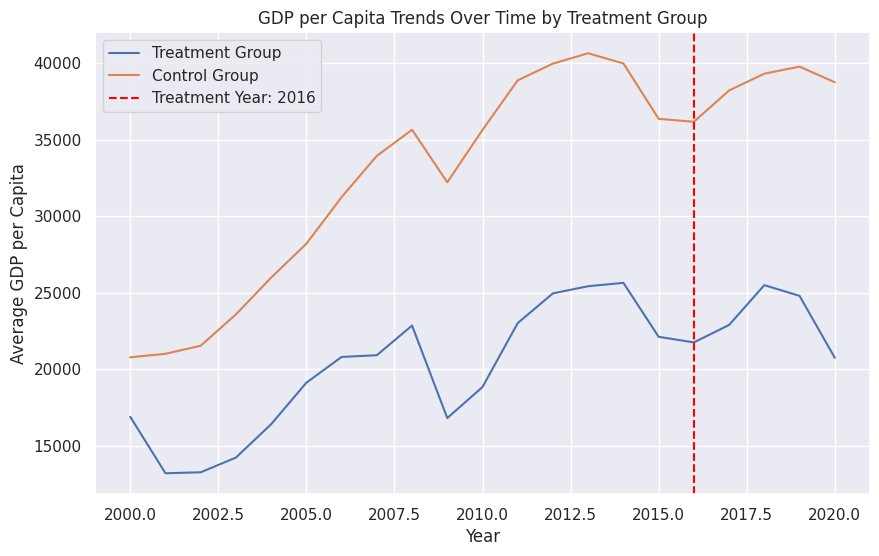

In [22]:
# Group the data by Year and Treatment status and calculate the mean GDP per Capita
treatment_group = df[df['treatment'] == 1].groupby('Year')['GDP_per_Capita'].mean()
control_group = df[df['treatment'] == 0].groupby('Year')['GDP_per_Capita'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(treatment_group.index, treatment_group.values, label='Treatment Group')
plt.plot(control_group.index, control_group.values, label='Control Group')

# Add a vertical line for the treatment year (2016)
plt.axvline(x=2016, color='red', linestyle='--', label='Treatment Year: 2016')

plt.xlabel('Year')
plt.ylabel('Average GDP per Capita')
plt.title('GDP per Capita Trends Over Time by Treatment Group')
plt.legend()
plt.grid(True)
plt.show()

R-squared: 0.927 indicates that about 92.7% of the variability in GDP per Capita is explained by the model’s predictors, indicating a strong fit.

Model Significance:
F-statistic: 99.07 is high, and the associated Prob (F-statistic) of 5.84e-44 implies the model is statistically significant.

**Coefficients Interpretation:**
- Intercept (-1.929e+05): The base level of GDP per Capita when all independent variables are zero.
- Treatment (1.886e+04): Indicates a significant positive effect on GDP per Capita (p < 0.001).
- Post (-88.4482): Suggests a negligible and not statistically significant effect (p = 0.968).
- Post_treatment (-8888.9081): Suggests a significant negative effect post-treatment (p < 0.01).
- HDI (1.858e+05): Shows a significant positive effect on GDP per Capita (p < 0.001).
- Gini_Coefficient (79.5915): A small positive effect, but not significant (p = 0.757).
- Democracy_Index (-1627.6112): Indicates a slight negative impact, close to being significant (p = 0.085).
- Debt_to_GDP_Ratio (97.5932): Significant positive effect (p < 0.01).
- Oil_Rent (443.1246): Indicates a significant positive effect (p < 0.01).
- Civil_Rights_Freedom_Indexes (8046.6552): Significant positive impact (p < 0.05).
Oil_Export (-0.4531) and Oil_Production (0.5715): Neither show significant effects on GDP per Capita.

**Model Diagnostics:**
Omnibus/Prob(Omnibus) and Jarque-Bera (JB)/Prob(JB) suggest deviations from the normal distribution in the residuals.
Durbin-Watson: A value of 0.565 suggests potential positive autocorrelation.
Skew and Kurtosis: Indicate the shape of the distribution of residuals.

Multicollinearity Warning:
- The large condition number (4.35e+05) indicates potential multicollinearity issues,
- Multicollinearity Warning (continued):

The large condition number suggests potential multicollinearity. This condition indicates that some independent variables are highly correlated, which can affect the reliability of the coefficient estimates and make it difficult to disentangle the individual effects of correlated predictors.
Interpretation within Context:

The significant positive impact of HDI and Oil Rent on GDP per Capita suggests that higher human development levels and oil rents are associated with higher GDP per capita, indicating the influence of socio-economic factors and natural resources on economic performance.

The treatment effect being significant indicates its importance in understanding GDP per Capita, possibly reflecting the impact of specific policies or economic events.

The negative post-treatment effect might warrant further investigation to understand its implications and whether it reflects an actual economic downturn or other factors post-intervention.
Caveats:

The presence of multicollinearity suggests caution in interpreting the individual effects of predictors, as their impact might not be isolated.
The potential issues with residual distribution (non-normality and autocorrelation) may affect the model's assumptions and the reliability of the predictions and conclusions.
In summary, the model provides valuable insights into the determinants of GDP per Capita, highlighting the significance of human development, oil-related variables, and debt management. However, the potential multicollinearity and distribution issues in the residuals should be addressed for more robust conclusions. This could involve further analysis, possibly including a re-examination of the variables included in the model or the use of techniques to address multicollinearity and autocorrelation.

In [23]:
# Regression Model for DiD Analysis using HDI as the Dependent Variable
formula_social = 'HDI ~ treatment + post + post_treatment + GDP_per_Capita + Gini_Coefficient + Democracy_Index + Debt_to_GDP_Ratio + Oil_Rent + Civil_Rights_Freedom_Indexes + Oil_Export + Oil_Production'

# Fit the model
model = smf.ols(formula_social, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    HDI   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     244.7
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           6.24e-60
Time:                        23:25:08   Log-Likelihood:                 276.94
No. Observations:                  98   AIC:                            -529.9
Df Residuals:                      86   BIC:                            -498.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

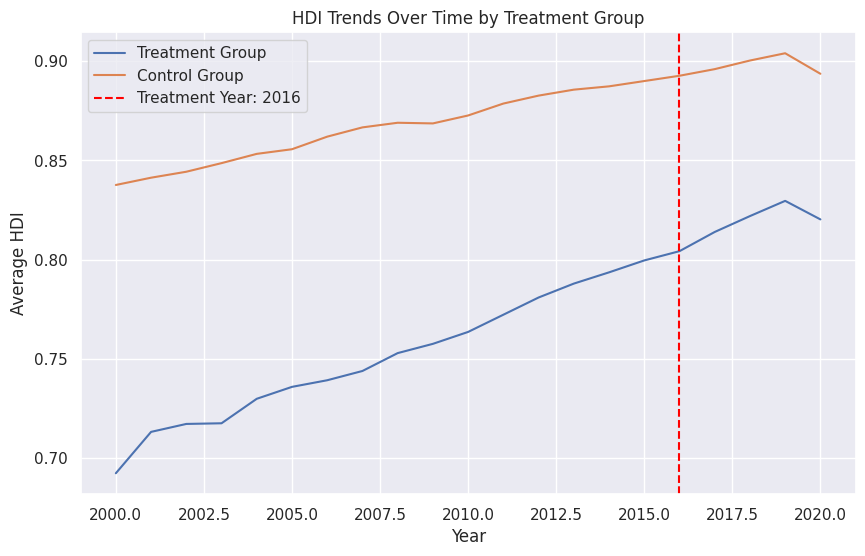

In [24]:
# Group the data by Year and Treatment status and calculate the mean HDI
treatment_group = df[df['treatment'] == 1].groupby('Year')['HDI'].mean()
control_group = df[df['treatment'] == 0].groupby('Year')['HDI'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(treatment_group.index, treatment_group.values, label='Treatment Group')
plt.plot(control_group.index, control_group.values, label='Control Group')

# Add a vertical line for the treatment year (2016)
plt.axvline(x=2016, color='red', linestyle='--', label='Treatment Year: 2016')

plt.xlabel('Year')
plt.ylabel('Average HDI')
plt.title('HDI Trends Over Time by Treatment Group')
plt.legend()
plt.grid(True)
plt.show()

ntercept (0.6028): The baseline value of HDI when all other variables are zero.
Treatment (0.0493): Suggests a positive effect on HDI. It's statistically significant (p=0.001).
Post (-0.0043): Indicates a slightly negative but not significant effect on HDI (p=0.495).
Post_treatment (0.0368): Shows a positive and significant effect (p<0.001),
GDP_per_Capita (1.539e-06): Indicates a small positive impact on HDI, significant (p<0.001).
Gini_Coefficient (-0.0037): A negative effect on HDI, significant (p<0.001).
Democracy_Index (-0.0038): A slight negative impact, but not statistically significant (p=0.166).
Debt_to_GDP_Ratio (-0.0004): Slight negative impact, statistically significant (p<0.001).
Oil_Rent (-0.0021): Negative effect on HDI, significant (p<0.001).
Civil_Rights_Freedom_Indexes (0.0450): Positive and significant impact on HDI (p<0.001).
Oil_Export (1.132e-05) and Oil_Production (4.941e-06): Both show positive, significant effects on HDI.Dependent Variable: HDI
- R-squared: 0.970 (97%, of the variance in HDI is explained by the model)
- Adjusted R-squared: 0.960 (Reflects the model's explanatory power after   adjusting for the number of predictors)
- F-statistic: 95.93 (Indicating the overall significance of the regression model)
- Prob (F-statistic): 8.91e-22 (Implies the model is statistically significant)

Coefficients Interpretation:
- Intercept (0.7087): The baseline level of HDI when all other variables are zero. Statistically significant (p < 0.001).
- Treatment (0.0500): Suggests a positive impact of the treatment on HDI, but it's marginally significant (p = 0.064).
- Post (0.0076): Indicates the change in HDI after the treatment period for the control group. Not significant (p = 0.420).
- Post_treatment (0.0312): Represents the DiD estimate. It suggests that the treatment led to an increase in HDI, and it's statistically significant (p = 0.029).
- GDP_per_Capita: Positively associated with HDI and statistically significant.
- Gini_Coefficient, Democracy_Index, and Civil_Rights_Freedom_Indexes: These variables show varying degrees of significance, with Gini_Coefficient being marginally significant.
- Debt_to_GDP_Ratio and Oil_Rent: Negatively associated with HDI and statistically significant.
- Oil_Export and Oil_Production: Both show a positive association with HDI. Oil_Production is statistically significant (p = 0.031), suggesting a positive impact on HDI, whereas Oil_Export is marginally significant (p = 0.083).

Model Fit and Diagnostics:
- Durbin-Watson: 0.896, indicating a low to moderate level of autocorrelation in the residuals.
- Omnibus and Jarque-Bera Tests: The low values suggest no significant deviations from normality in the residuals.
- Condition Number (1.22e+06): A high condition number points to potential multicollinearity issues, which might affect the precision of coefficient estimates.

Conclusions and Implications:
- The model demonstrates a strong fit with a high R-squared value, explaining a significant portion of the variability in HDI.
- The DiD estimate (post_treatment) is statistically significant, suggesting that the treatment event had a positive impact on HDI.
- The findings indicate that economic variables like GDP per capita, Debt to GDP ratio, and Oil Rent have significant associations with HDI.
- While there are signs of multicollinearity, the key variables of interest (treatment, post, post_treatment) show statistical significance, lending support to the impact of the treatment event on HDI.